In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import math

import random

In [2]:
rng = np.random.default_rng(1234)

# Algorytm

In [4]:
from AntColony import *

# Definicja problemu

In [5]:
M = 30

G=nx.Graph()
G.add_edges_from([(0, j) for j in range(1, M)])

edges = [(i, j) for i in range(M) for j in range(M) if i != j]
#edges = rng.choice(edges, 50)
G.add_edges_from(edges)

#edges = [(i, j) for i in range(1, int(M/2)) for j in range(1, int(M/2)) if i != j]
#edges = rng.choice(edges, 300)
#G.add_edges_from(edges)

#edges = [(i, j) for i in range(int(M/2), M) for j in range(int(M/2), M) if i != j]
#edges = rng.choice(edges, 300)
#G.add_edges_from(edges)

In [6]:
pos = nx.spring_layout(G, seed=1234)

In [7]:
P = list((M) * ["red"])
P[0] = "blue"

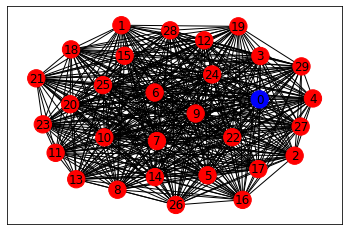

In [8]:
fig1 = nx.draw_networkx(G, pos = pos, node_color=P)

# Przygotowanie do plotowania

In [9]:
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(M)]

In [10]:
def plot_solution(antColony):
    i = 0
    for node in antColony.best_path:
        if node == 0:
            i += 1
        else:
            P[node] = color[i-1]

    G=nx.Graph()
    G.add_edges_from([(i, j) for i in range(M) for j in range(M) if i != j])

    fig1 = nx.draw_networkx(G, pos = pos, node_color=P,
                            edgelist = [(antColony.best_path[i], antColony.best_path[i+1]) for i in range(len(antColony.best_path)-1)])

In [11]:
def plot_clusters(coordinates, labels):
    colours = np.max(labels)
    for i in range(len(labels)):
        P[i] = color[labels[i]]
    
    G=nx.Graph()
    G.add_edges_from([(i, j) for i in range(M) for j in range(M) if i != j])

    fig1 = nx.draw_networkx(G, pos = pos, node_color=P,
                            edgelist = [(i, j) for i in range(len(labels)) for j in range(len(labels)) if i != j])

# Rozwiązanie

In [12]:
antColony = AntColony(number_of_ants=None, alpha=1, beta=5, starting_pheromone = 1, Q = 1)

coordinates = np.empty((M,2))
for i in range(M):
    coordinates[i] = pos[i]

request = np.ones(M-1) * 10

antColony.set_problem(coordinates, request, 110, 1000, 5)

Adding 0 as technical request for warehouse


In [13]:
antColony.optimize(1, print_progress=True)

New best solution in 0 iteration: cost = 16.78723 and uses 4 trucks


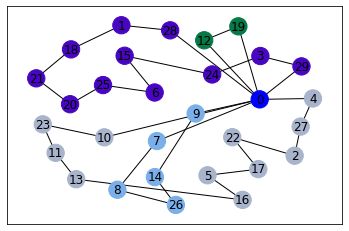

In [14]:
plot_solution(antColony)

In [16]:
antColony.optimize(100, print_progress=True, restart=False)

New best solution in 10 iteration: cost = 16.69103 and uses 4 trucks
New best solution in 11 iteration: cost = 15.71674 and uses 3 trucks
New best solution in 29 iteration: cost = 15.66029 and uses 5 trucks
New best solution in 48 iteration: cost = 15.17905 and uses 3 trucks


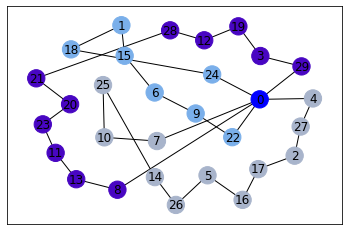

In [17]:
plot_solution(antColony)

In [18]:
antColony.optimize(1000, print_progress=True, restart=False)

New best solution in 104 iteration: cost = 14.83872 and uses 3 trucks
New best solution in 545 iteration: cost = 14.40538 and uses 3 trucks


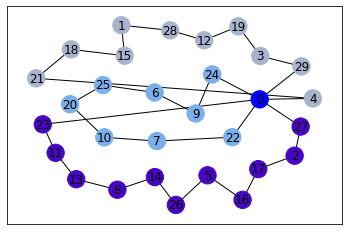

In [19]:
plot_solution(antColony)

# Rozwiązanie Reduced

In [21]:
antColony = AntColony_Reduced(number_of_ants=None, alpha=1, beta=5, starting_pheromone = 1, Q = 1)

coordinates = np.empty((M,2))
for i in range(M):
    coordinates[i] = pos[i]

request = np.ones(M-1) * 10

antColony.set_problem(coordinates, request, 110, 1000, 5)

Adding 0 as technical request for warehouse


In [22]:
antColony.optimize(1, print_progress=True)

New best solution in 0 iteration: cost = 14.68994 and uses 4 trucks


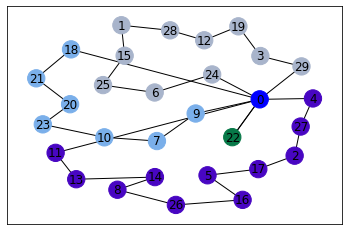

In [23]:
plot_solution(antColony)

In [25]:
antColony.optimize(100, print_progress=True, restart=False)

New best solution in 1 iteration: cost = 14.41697 and uses 5 trucks
New best solution in 10 iteration: cost = 14.03164 and uses 4 trucks
New best solution in 14 iteration: cost = 13.68918 and uses 3 trucks
New best solution in 57 iteration: cost = 13.65092 and uses 4 trucks


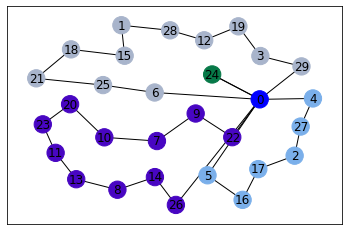

In [26]:
plot_solution(antColony)

In [28]:
antColony.optimize(1000, print_progress=True, restart=False)

New best solution in 122 iteration: cost = 13.51764 and uses 3 trucks
New best solution in 292 iteration: cost = 13.14714 and uses 3 trucks


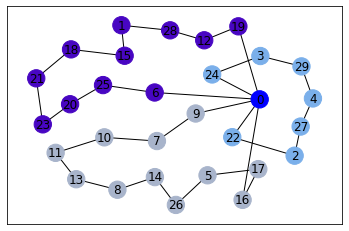

In [29]:
plot_solution(antColony)

# Rozwiązanie Divided

In [34]:
antColony = AntColony_Divided(number_of_ants=None, alpha=1, beta=5, starting_pheromone = 1, Q = 1, print_progress=True)

coordinates = np.empty((M,2))
for i in range(M):
    coordinates[i] = pos[i]

request = np.ones(M-1) * 10

antColony.set_problem(coordinates, request, 110, 1000, 5)

Adding 0 as technical request for warehouse
Użyto 3 klastrów w licznosciach [10, 11, 8]


In [35]:
antColony.optimize(1, print_progress=True, restart=False)

New best solution in 0 iteration: cost = 16.54443 and uses 5 trucks


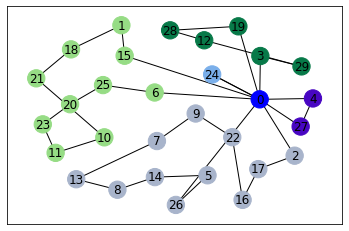

In [36]:
plot_solution(antColony)

In [37]:
antColony.optimize(100, print_progress=True, restart=False)

New best solution in 0 iteration: cost = 15.92637 and uses 4 trucks
New best solution in 4 iteration: cost = 15.91350 and uses 3 trucks
New best solution in 5 iteration: cost = 15.57700 and uses 5 trucks
New best solution in 6 iteration: cost = 15.57322 and uses 4 trucks
New best solution in 9 iteration: cost = 14.98503 and uses 4 trucks
New best solution in 16 iteration: cost = 13.92739 and uses 4 trucks


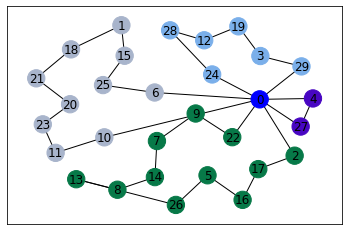

In [38]:
plot_solution(antColony)

In [39]:
antColony.optimize(1000, print_progress=True, restart=False)

New best solution in 158 iteration: cost = 13.91702 and uses 4 trucks
New best solution in 641 iteration: cost = 13.83660 and uses 3 trucks


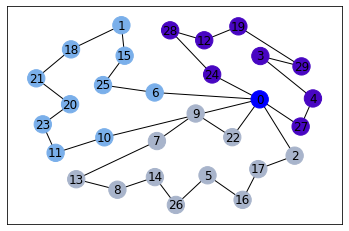

In [40]:
plot_solution(antColony)